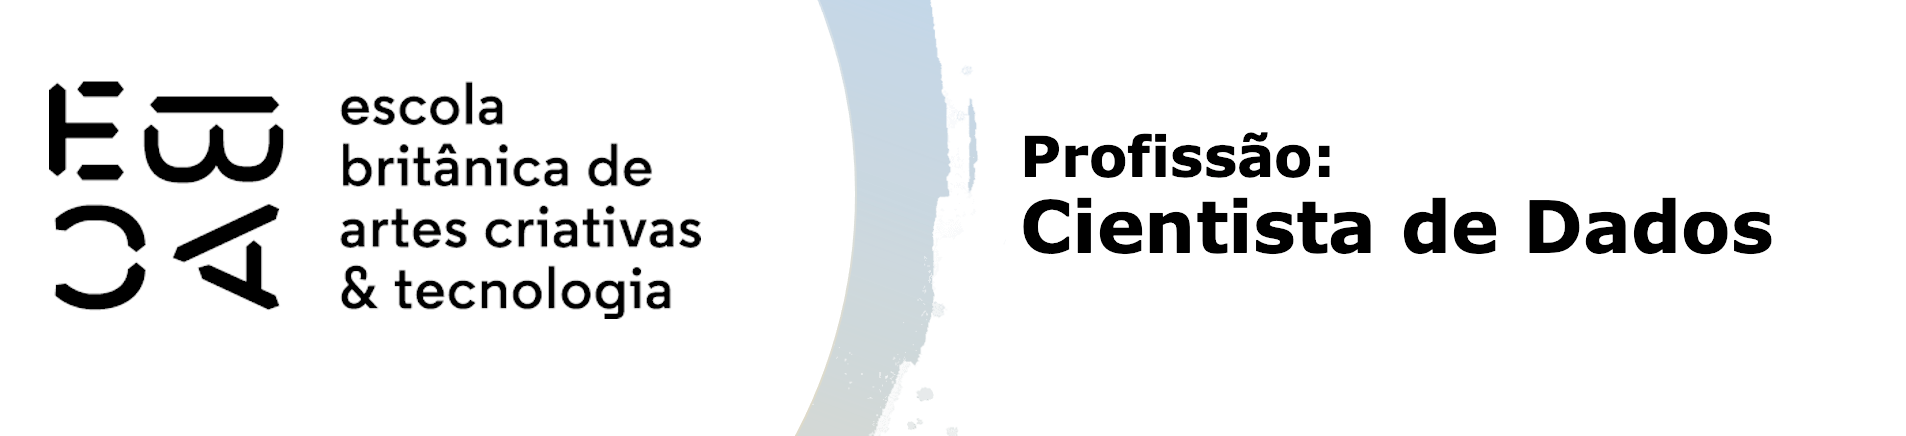

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [6]:
peng = sns.load_dataset('penguins')
peng.index.name = 'id'
df = peng.select_dtypes('number').dropna()
peng_pad = StandardScaler().fit_transform(df)

clus = AgglomerativeClustering(linkage="complete",
                               distance_threshold=None,
                               n_clusters=3)
clus.fit(peng_pad)

df['grupo'] = clus.labels_

peng = peng.merge(df['grupo'], how='left', on='id')

pd.crosstab(peng['species'], peng['grupo'])

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


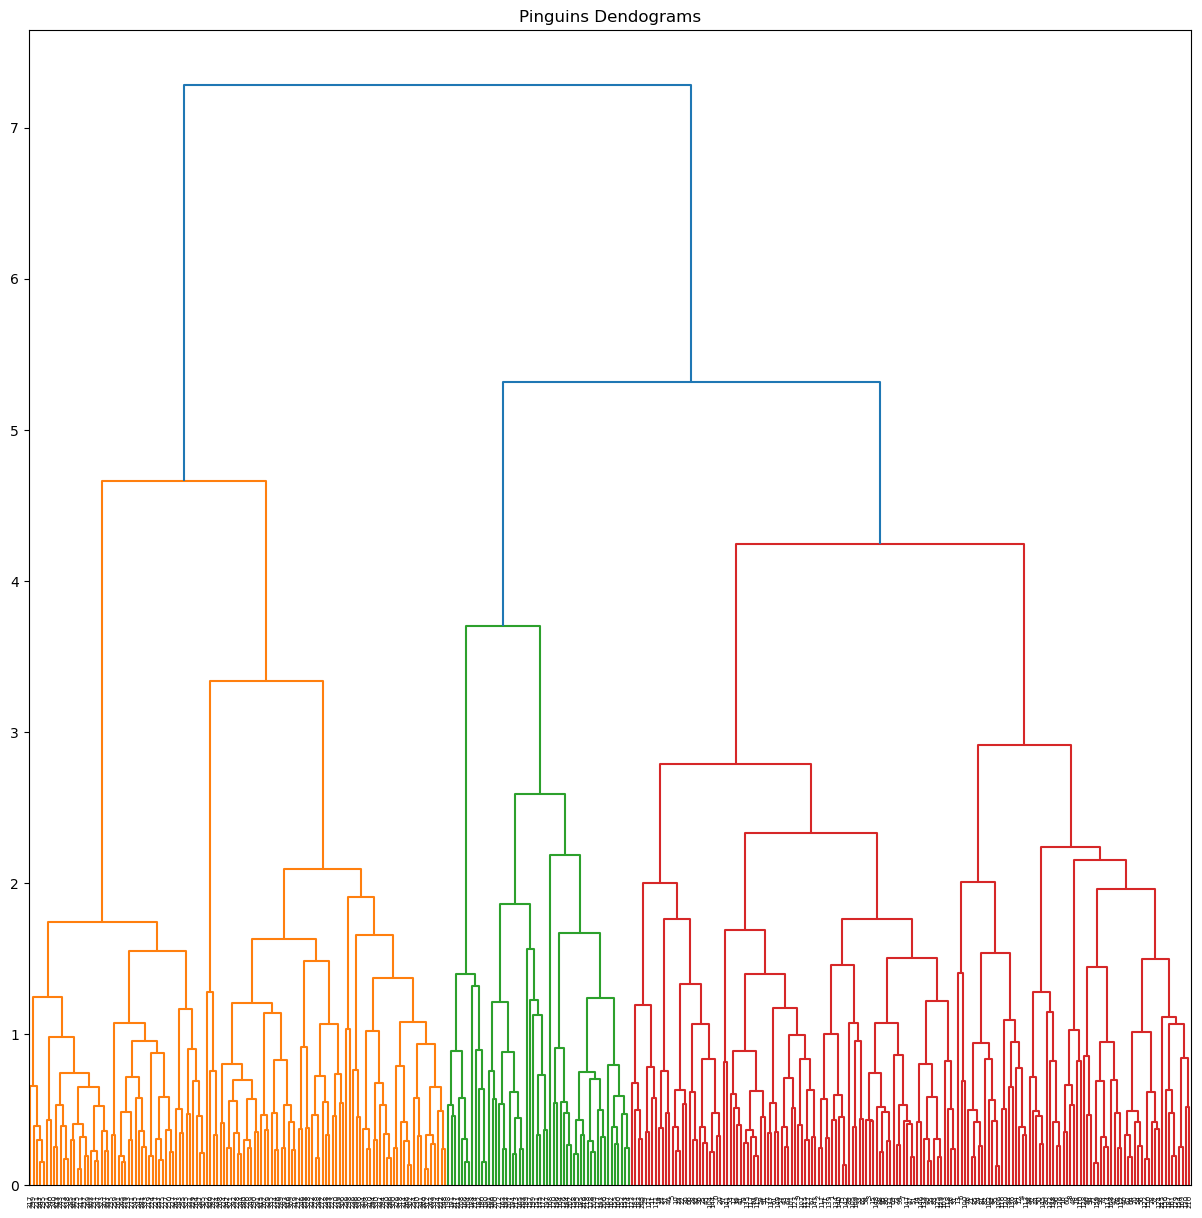

In [10]:
plt.figure(figsize=(15, 15))

plt.title("Pinguins Dendograms")

dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

O grupo 0 contém todos os pinguins da especie Gentoo, o grupo 1 contém quase todos os pinguins da especie Adelie e 14 pinguins da especie Chinstrap, o grupo 2 contém quase todos os pinguins da especie Chinstrap.  

In [11]:
peng.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1.0
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,1.0
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male,1.0
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,1.0


> A está sobreposição entre os grupos 1 e 2 pois como podemos ver no gráfico abaixo ambos os pinguins de cada especie, tem peso corporal parecidos, apesar das médias serem diferentes, há sobreposição entre os grupos. Apenas as fêmeas foram categorizadas erróneamente no grupo 2, possivelmente aquelas com peso corporal muito baixo, visto que o grupo apresenta um maior maior numero de outlier comparado as demais especies. 

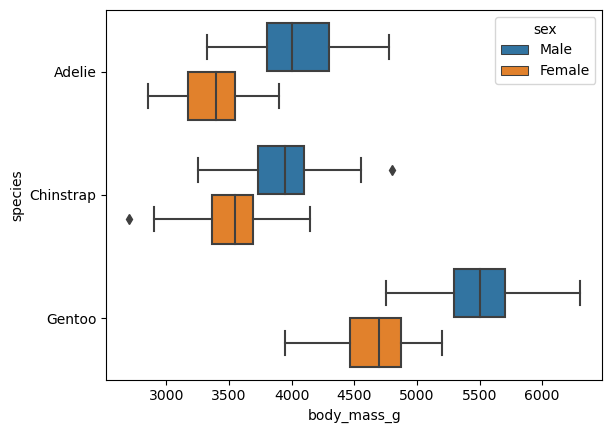

In [12]:
sns.boxplot(data=peng, x='body_mass_g', y='species', hue='sex')
plt.show()

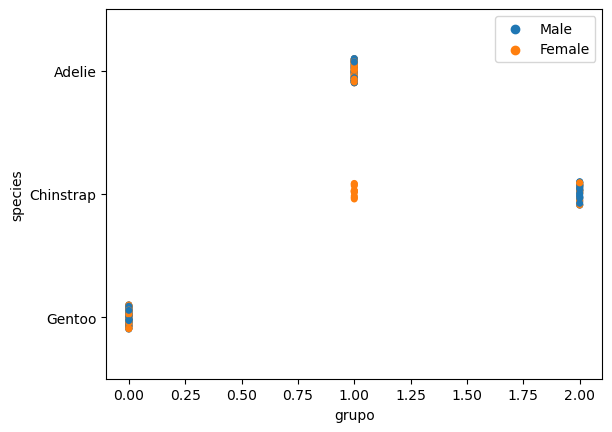

In [14]:
sns.stripplot(data=peng, x='grupo', y='species', hue='sex')
plt.legend(loc='best')
plt.show()

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

> O dentograma sugere a divisão em 6 grupos, para divirmos entre especie e sexo, poís as femeas tem padrão corporal distinto.

In [22]:
clus = AgglomerativeClustering(linkage="complete",
                               distance_threshold=None,
                               n_clusters=6)
clus.fit(peng_pad)


AgglomerativeClustering(linkage='complete', n_clusters=6)

In [29]:
df['grupo'] = clus.labels_

peng = peng.merge(df['grupo'], how='left', on='id')

pd.crosstab(index=[peng['species'], peng['sex']], columns=peng['grupo'])


grupo             0.0  1.0  2.0  3.0  4.0  5.0
species   sex                                 
Adelie    Female    0   69    4    0    0    0
          Male      0   18   55    0    0    0
Chinstrap Female    0    5    9    0   20    0
          Male      0    0    0    0   22   12
Gentoo    Female    9    0    0   49    0    0
          Male     61    0    0    0    0    0

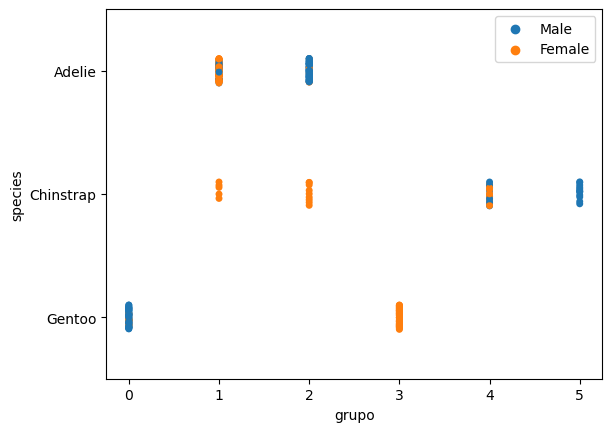

In [25]:
sns.stripplot(data=peng, x='grupo', y='species', hue='sex')
plt.legend(loc='best')
plt.show()

A divisão em 6 grupos foi quase perfeita, o grupo 0 capturou todos os pinguins da especie Gentoo machos e quase todas as femeas no grupo 3, entretanto novamente houve sobreposição entre os grupos nas especies Adelie e Chinstrap, o grupo 1 capturou todos os pinguins da especie Adelie femeas e alguns machos alem de 5 pinguins Chinstrap, o mesmo ocorre no grupo 3 que captou 9 pinguins da especie Chinstrap todas femeas. 